# Problem 4 (Three Dimensional)
Repeat the exercise above with particles in the middle of the plane and let particles choose between moving up, down, right, and left. How do things change if you let the particle move diagonally? (i.e., there are eight directions of movement). Compare the results of both experiments.
## The code:

In [7]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

In [8]:
def create_grid(count, length):
    grid = np.array([[[[0 for i in range(length)] for j in range(length)] for k in range(length)] for n in range(count)])
    
    for n in range(count):
        grid[n][len(grid[0]) // 2][len(grid[0]) // 2][len(grid[0]) // 2] = 1
        
    return grid

In [9]:
def index_3d(array, element):
    for i in range(len(array)):
        for j in range(len(array[i])):
            for k in range(len(array[i][j])):
                if array[i][j][k] == 1:
                    index = (i, j, k)
                           
    return index 

In [10]:
def move(grid, direction):
    index = index_3d(grid, 1)
    #TODO: no diagonal movement...for now
    if direction == 'right':
        grid[index[0]][index[1]][index[2] + 1] = 1
        grid[index[0]][index[1]][index[2]] = 0
        
    elif direction == 'left':
        grid[index[0]][index[1]][index[2] - 1] = 1
        grid[index[0]][index[1]][index[2]] = 0
    
    elif direction == 'up':
        grid[index[0]][index[1] + 1][index[2]] = 1
        grid[index[0]][index[1]][index[2]] = 0
        
    elif direction == 'down':
        grid[index[0]][index[1] - 1][index[2] + 1] = 1
        grid[index[0]][index[1]][index[2]] = 0
    
    elif direction == 'forward':
        grid[index[0] + 1][index[1]][index[2] + 1] = 1
        grid[index[0]][index[1]][index[2]] = 0
    
    elif direction == 'backward':
        grid[index[0] - 1][index[1]][index[2] + 1] = 1
        grid[index[0]][index[1]][index[2]] = 0

In [16]:
def main(count = 100, steps = 10):
    length = 2 * steps + 2
    
    grid = create_grid(count, length)
#    plt.imshow(grid[0])
#    plt.show()
    
    for x in range(steps):
        for n in range(count):
            chance = random.random()
            if chance < 1/6:
                move(grid[n], 'right')
            elif chance < 2/6:
                move(grid[n], 'left')
            elif chance < 3/6:
                move(grid[n], 'up')
            elif chance < 4/6:
                move(grid[n], 'down')
            elif chance < 5/6:
                move(grid[n], 'forward')
            else:
                move(grid[n], 'backward')
                        
            
    mean = np.mean(np.array([n for n in grid]), axis=0)
    x, y, z = mean.nonzero()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, -z, zdir='z', c= 'red')

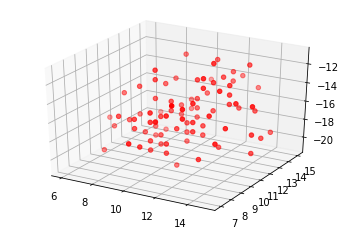

In [17]:
main()